<a href="https://colab.research.google.com/github/shakilB/Projects/blob/main/SA_in_Bengali_Language_Using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ktrain

In [ ]:
import tensorflow as tf

import ktrain

from ktrain import text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('/content/finaldataset.csv')

In [ ]:
data.shape

(13802, 6)

In [ ]:
data.head()

,data,title_x,title_y,title,value,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,-1,-1,2,-1,কিছুটা নেতিবাচক
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,-1,-1,-1,-1,কিছুটা নেতিবাচক
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,-1,-2,-2,-5,নিশ্চিত নেতিবাচক
3,চুরি নয় লুটপাট।,-2,-2,-2,-6,নিশ্চিত নেতিবাচক
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,0,-1,0,0,নিরপেক্ষ


In [ ]:
data.drop(['title_x','title_y','title','value'],axis=1,inplace=True)

In [ ]:
data.head()

,data,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,কিছুটা নেতিবাচক
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,কিছুটা নেতিবাচক
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,নিশ্চিত নেতিবাচক
3,চুরি নয় লুটপাট।,নিশ্চিত নেতিবাচক
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,নিরপেক্ষ


In [ ]:
data.shape

(13802, 2)

In [ ]:
data.describe()

,data,tag
count,13802,13802
unique,13542,5
top,"গনতন্ত্র শক্তিশালী না হলে দেশ লুটপাট হয়ে যাবে,...",নিশ্চিত নেতিবাচক
freq,2,3928


In [ ]:
data.isnull().sum()

data    0
tag     0
dtype: int64

In [ ]:
data.tag.unique()

array(['কিছুটা নেতিবাচক', 'নিশ্চিত নেতিবাচক', 'নিরপেক্ষ',
       'কিছুটা ইতিবাচক', 'নিশ্চিত ইতিবাচক'], dtype=object)

In [ ]:
data.loc[(data.tag == 'কিছুটা নেতিবাচক'),'label']=1
data.loc[(data.tag == 'নিশ্চিত নেতিবাচক'),'label']=1
data.loc[(data.tag == 'নিরপেক্ষ'),'label']=0
data.loc[(data.tag == 'কিছুটা ইতিবাচক'),'label']=2
data.loc[(data.tag == 'নিশ্চিত ইতিবাচক'),'label']=2


In [ ]:
data['label'] = data['label'].apply(np.int64)

In [ ]:
data.sample(10)

,data,tag,label
10394,@রনি-আরিফ@দোষ রিপোর্টারকে দিয়ে লাভ কি সাম্পাওল...,নিরপেক্ষ,0.0
2926,ভেবেছিল প্রতিবাদী অন্য সৌদি নাগরিকদের যেভাবে '...,নিশ্চিত নেতিবাচক,1.0
9833,আশরাফুল আমার ফেবারিট,নিশ্চিত ইতিবাচক,2.0
10066,পাকিস্তানের কপালে সেই ভাগ্য কি আর কখনো হবে? আ...,কিছুটা নেতিবাচক,1.0
5959,"আপনাদের পক্ষে তো কেউই নাই, কি করবেন এখন!",কিছুটা নেতিবাচক,1.0
9204,পাকিস্তান চিন দেশে গাধা রপ্তানি করে বিদেশি মুদ...,নিরপেক্ষ,0.0
9414,ও যে এগোচ্ছে তাতে সেন্চুরির সেন্চুরি অবশ্যই হবে।,নিশ্চিত ইতিবাচক,2.0
11281,সিরিজ হারা ঠেকাতে কী করতে হবে বাংলাদেশকে? বেশি...,নিশ্চিত নেতিবাচক,1.0
5833,কেউ আমাকে অনুগ্রহ করে একটু বলবেন কি যে সরকারি ...,কিছুটা নেতিবাচক,1.0
1437,ইসলামী ব্যাংকে গিলতে গিয়ে তা এখন এমন এক জায়গায়...,নিশ্চিত নেতিবাচক,1.0


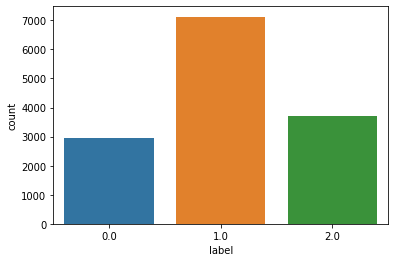

In [ ]:
tmp =  data['label'].value_counts().sort_index()
import seaborn as sb
sb.countplot(x='label' , data = data , order = tmp.index)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
data.label

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
13797    0.0
13798    0.0
13799    0.0
13800    0.0
13801    0.0
Name: label, Length: 13802, dtype: float64

In [ ]:
new_df = data.loc[: , ['data' , 'label']] 

In [ ]:
new_df.head()

,data,label
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,1.0
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,1.0
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,1.0
3,চুরি নয় লুটপাট।,1.0
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,0.0


In [ ]:
class_weights = list(class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(new_df['label']),
                                        y = new_df['label']                                                    
                                    ))
weights = dict(zip(np.unique(new_df['label']), class_weights))
weights

{0.0: 1.559019541398396, 1.0: 0.6456169894283843, 2.0: 1.2350782997762864}

In [ ]:
train_data = new_df.iloc[0:9661][:]


In [ ]:
train_data.shape

(9661, 2)

In [ ]:
test_data = new_df.iloc[9661:][:]

In [ ]:
test_data.shape

(4141, 2)

In [ ]:
(X_train, y_train), (X_test , y_test) , preproc = text.texts_from_df(train_df= new_df,
                                                                     text_column = 'data',
                                                                     label_columns = 'label',
                                                                     maxlen=512,
                                                                     preprocess_mode = 'bert'
                                                                     )

/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:637: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:637: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


['label_0.0', 'label_1.0', 'label_2.0']
       label_0.0  label_1.0  label_2.0
1153         0.0        0.0        1.0
6631         0.0        0.0        1.0
2386         0.0        1.0        0.0
12189        0.0        1.0        0.0
10507        1.0        0.0        0.0
['label_0.0', 'label_1.0', 'label_2.0']
       label_0.0  label_1.0  label_2.0
11484        0.0        1.0        0.0
400          1.0        0.0        0.0
8295         0.0        1.0        0.0
9840         1.0        0.0        0.0
7816         0.0        1.0        0.0
preprocessing train...
language: bn


Is Multi-Label? False
preprocessing test...
language: bn


In [ ]:
model = text.text_classifier(name='bert',
                             train_data = (X_train ,y_train),
                             preproc= preproc)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

Is Multi-Label? False
maxlen is 512
done.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 512)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 512)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 512, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 512, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
learner = ktrain.get_learner(model = model , train_data=(X_train , y_train),
                             val_data = (X_test , y_test),
                             batch_size = 6)

In [ ]:
learner.fit(5e-3, 2)

Epoch 1/2


In [ ]:
#learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/1024


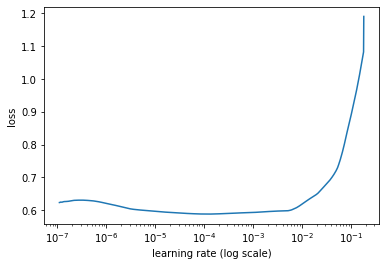

In [ ]:
learner.lr_plot()

In [ ]:
#learner.fit_onecycle(lr=10**-5, epochs=1, class_weight=weights)



begin training using onecycle policy with max lr of 1e-05...


ResourceExhaustedError: ignored

In [ ]:
# predictor = ktrain.get_predictor(learner.model, preproc)
# predictor.save('/content/drive/My Drive/bert')

In [ ]:
test_data.head()

,data,label
9661,আওয়ামীলীগের মত গোষ্ঠীর সাথে একাত্বতা পোষণ না ক...,0
9662,যারা মাশরাফিকে ভালোবাসে কিন্তু তার আওয়ামী লিগে...,0
9663,বিএনপি যে নাহ সেতাই বড় ভালো বিষয়,1
9664,মাশরাফি কি আমাদের কাছে শচীন টেন্ডুলকার বা ম্যা...,1
9665,"মি. কেপ্টেইন, আপনি ক্রিকেট ও খেলবেন এম পি ও হব...",1


In [ ]:
content = df_test['data'].tolist()
labels = df_test['label'].tolist()

In [ ]:
import re
def rex(token):
  return re.sub("([A-Za-z0-9_:.]+|[\n]+|[\xa0]+|শেয়ার করুন,)","",token)

In [ ]:
test =[rex(token) for token in content]

In [ ]:
pred = predictor.predict(test)
# pred= labeling(pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels, pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['1', '0','2']
print(classification_report(labels , pred ,target_names = target_names ))